In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [9]:
DATADIR = '/content/drive/MyDrive/herb-data/train'    # base directory
CATEGORIES = ['Aloevera', 'Bamboo', 'Castor', 'Neem', 'Tamarind']

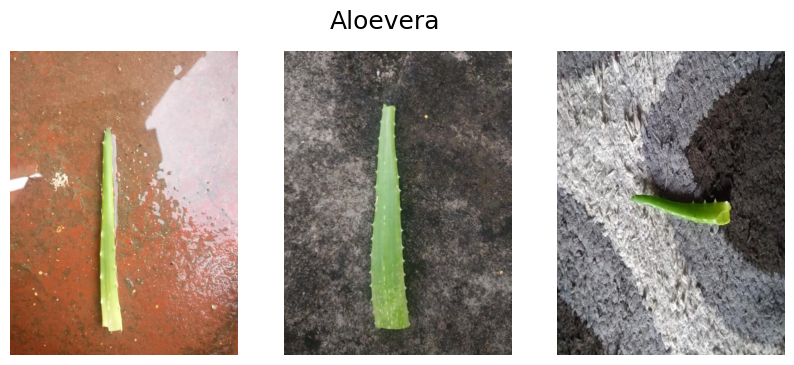

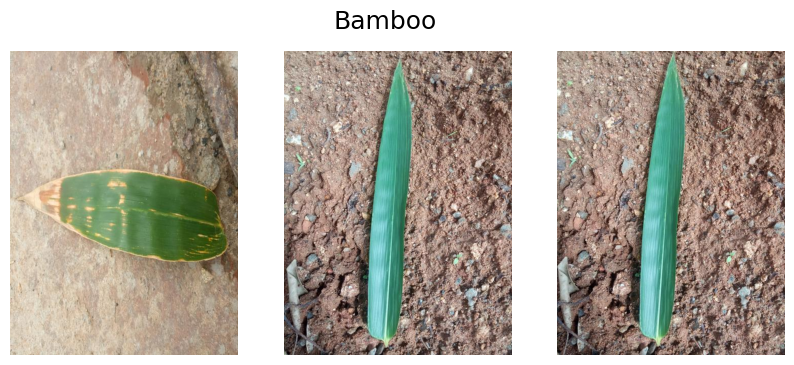

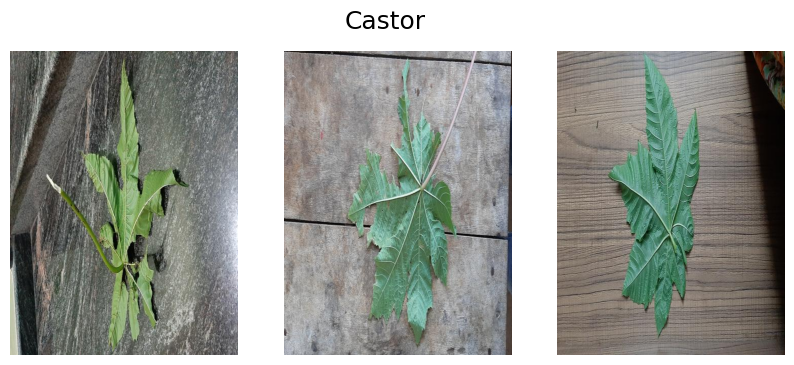

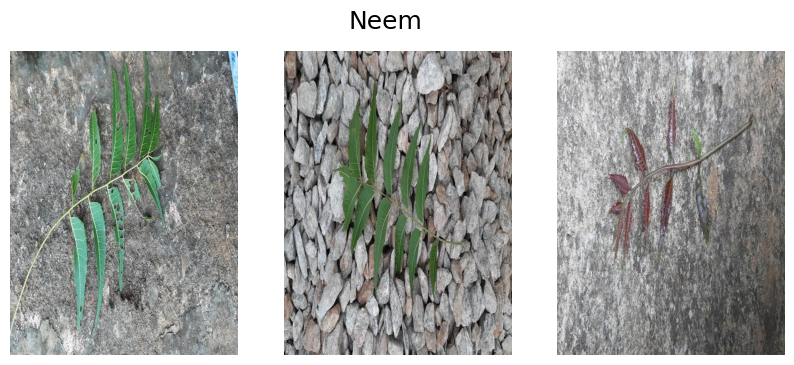

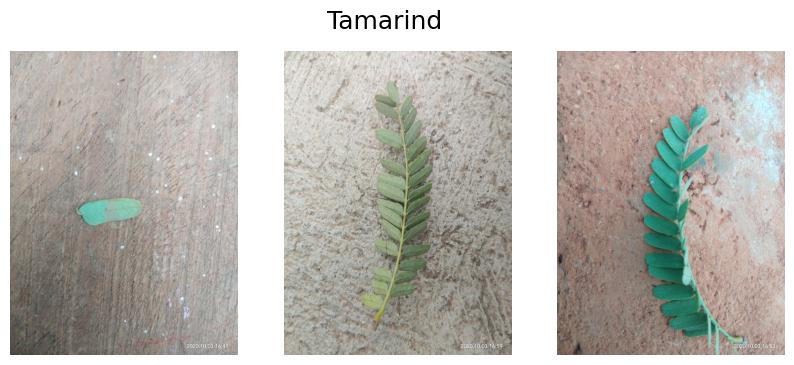

In [10]:
# visulaizing the images
for category in CATEGORIES:
  #constructing the path
  path = os.path.join(DATADIR, category)
  images = os.listdir(path)

  fig, ax = plt.subplots(1, 3, figsize = (10, 4))
  fig.suptitle(f'{category}', fontsize = 18)

  for i in range(3):
    img_name = images[np.random.randint(0, len(images))]
    img_path = os.path.join(path, img_name)
    img_array = cv2.imread(img_path)

    # converting the BGR images to RGB
    img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    ax[i].imshow(img_rgb)
    ax[i].axis('off')

In [11]:
def count_images(directory):
  for category in CATEGORIES:
    path = os.path.join(directory, category)
    images = os.listdir(path)
    num_images = len(images)
    print(f'{category} : {num_images} images')

count_images(DATADIR)

Aloevera : 96 images
Bamboo : 96 images
Castor : 96 images
Neem : 95 images
Tamarind : 95 images


In [12]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [15]:
conv_base.trainable = False

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [22]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/herb-data/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/herb-data/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 478 images belonging to 5 classes.
Found 112 images belonging to 5 classes.


In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,813,381 (64.14 MB)

 Trainable params: 2,098,693 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
history = model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 245s 6s/step - accuracy: 0.4686 - loss: 1.7155 - val_accuracy: 0.7857 - val_loss: 0.6204
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 647ms/step - accuracy: 0.8663 - loss: 0.3218 - val_accuracy: 0.7946 - val_loss: 0.6419
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 659ms/step - accuracy: 0.9688 - loss: 0.1601 - val_accuracy: 0.7321 - val_loss: 0.8466
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 640ms/step - accuracy: 0.9681 - loss: 0.1027 - val_accuracy: 0.7589 - val_loss: 0.7793
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 588ms/step - accuracy: 0.9726 - loss: 0.0942 - val_accuracy: 0.7768 - val_loss: 0.8779
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 597ms/step - accuracy: 0.9796 - loss: 0.0897 - val_accuracy: 0.8125 - val_loss: 0.7457
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 648ms/step - accuracy: 0.9932 - loss: 0.0391 - val_accuracy: 0.7857 - val_loss: 0.9011
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 594ms/step - accuracy: 0.9759 - loss: 0.0530 - val_accuracy: 0.7411 

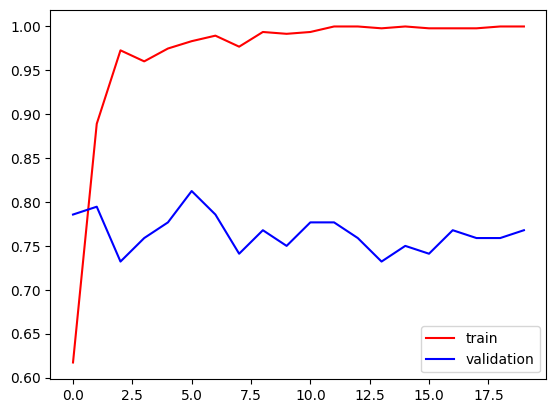

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

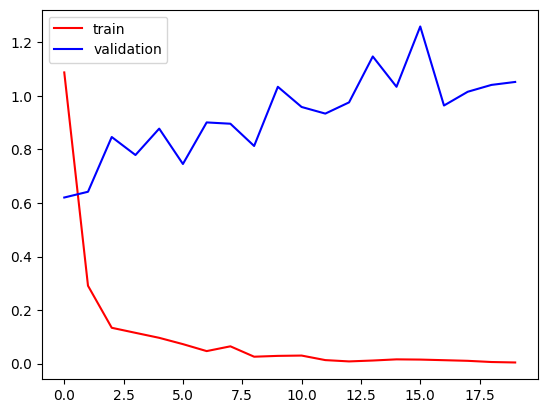

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


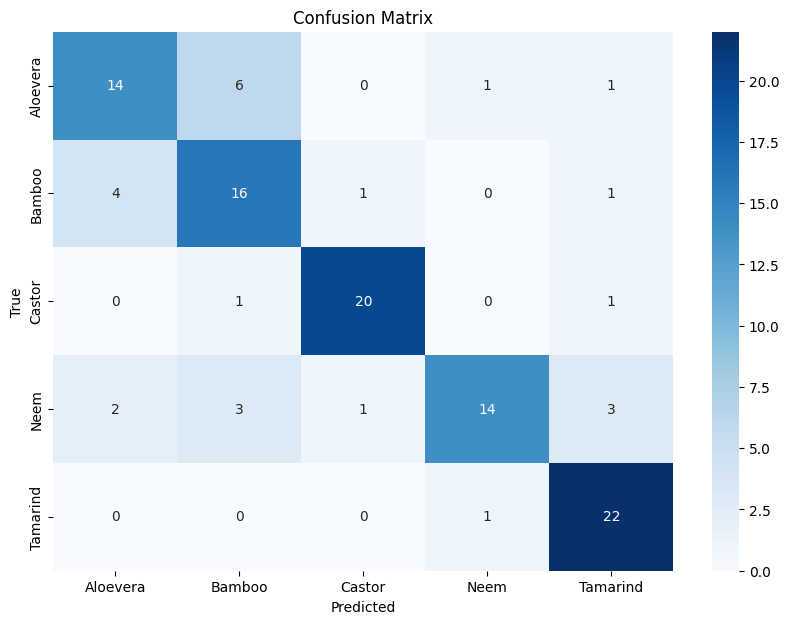

              precision    recall  f1-score   support

    Aloevera       0.70      0.64      0.67        22
      Bamboo       0.62      0.73      0.67        22
      Castor       0.91      0.91      0.91        22
        Neem       0.88      0.61      0.72        23
    Tamarind       0.79      0.96      0.86        23

    accuracy                           0.77       112
   macro avg       0.78      0.77      0.76       112
weighted avg       0.78      0.77      0.77       112



In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Get the true labels and predictions for the validation/test set
y_true = []
y_pred = []

# Loop through the validation data
for images, labels in validation_generator:
    y_true.extend(np.argmax(labels, axis=1))  # True labels
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels
    if len(y_true) >= validation_generator.samples:  # Stop after full dataset
        break

# Get class indices mapping from the generator
class_indices = validation_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels.values(), yticklabels=class_labels.values(), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels.values())
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


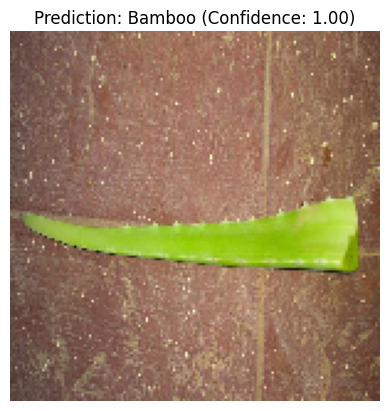

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


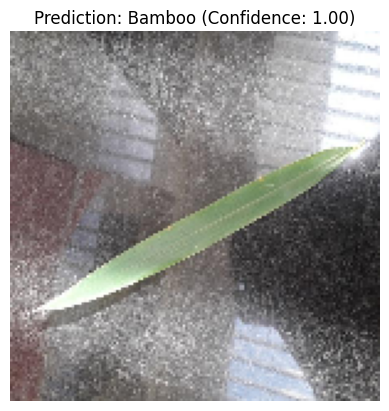

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


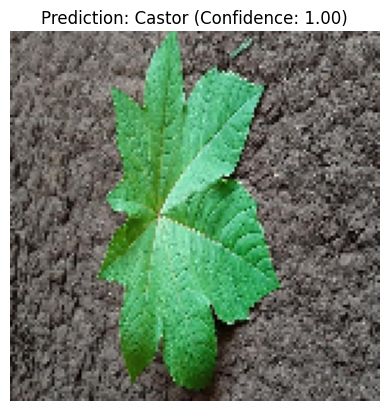

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


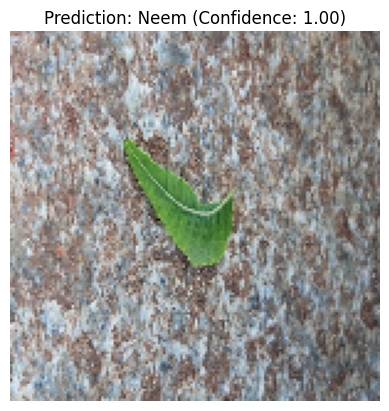

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


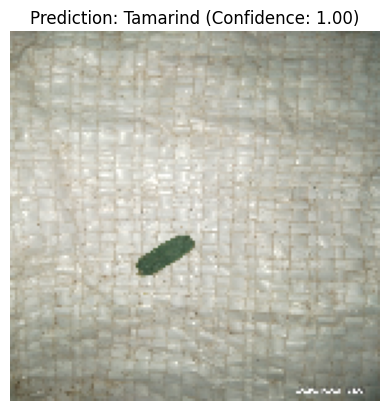

In [30]:
def test_on_images(image_paths, model, target_size=(150, 150)):
    """
    Function to test model on real images.

    Parameters:
    - image_paths: List of file paths to the images.
    - model: Trained model.
    - target_size: Target size for resizing images.

    Returns:
    - Predictions and their corresponding labels.
    """
    for image_path in image_paths:
        # Load and preprocess the image
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Rescale

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]
        confidence = np.max(prediction)

        # Display the image and prediction
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Prediction: {predicted_class} (Confidence: {confidence:.2f})')
        plt.show()

# Example usage
image_paths = [
    '/content/drive/MyDrive/herb-data/test/Aloevera/10.jpg',
    '/content/drive/MyDrive/herb-data/test/Bamboo/1444.jpg',
    '/content/drive/MyDrive/herb-data/test/Castor/300.jpg',
    '/content/drive/MyDrive/herb-data/test/Neem/1018.jpg',
    '/content/drive/MyDrive/herb-data/test/Tamarind/IMG_20201003_170310.jpg',
]
test_on_images(image_paths, model)


In [31]:
model.save('medicinal-herb-final-model.h5')